In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [162]:
df=pd.read_csv('TXF_minute_2021_285.csv')
data=df.values
price=data[:,3]

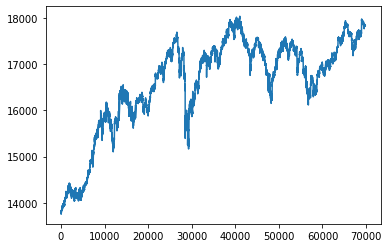

In [163]:
plt.plot(price)

In [164]:
def strategy1(price):
    return 200*(price[-1]-price[0])

def strategy2(price,sl_rate):
    cost=price[0]
    slp=(int)(cost*(1-sl_rate))
    for i in range(285):
        final_price=price[i]
        if price[i]<=slp:
            break
    return 200*(final_price-cost)

def strategy3(price,sl_rate,tp_rate):
    cost=price[0]
    slp=int(cost*(1-sl_rate))
    tpp=int(cost*(1+tp_rate))
    for i in range(285):
        final_price=price[i]
        if price[i]<=slp:
            break
        elif price[i]>=tpp:
            break
    return 200*(final_price-cost)

def strategy4(price):
  ma5=[0]*4
  cost = price[0]
  position = 0
  r = 0
  for i in range(281):
    ma5.append(np.mean(price[i:i+5]))
  for i in range(6,285):
    #Buy  
    if price[i-1]<=ma5[i-1] and  price[i]>ma5[i] and ma5[i-2]>ma5[i-1] and ma5[i]>ma5[i-1]:
      if position == 0:
        position = 1
        cost = price[i]
      elif position == -1:     
        position = 0   
        r += 200*(cost-price[i])    
    #sell
    elif price[i-1]>=ma5[i-1] and price[i]<ma5[i] and ma5[i-2]<ma5[i-1] and ma5[i]<ma5[i-1]:
      if position == 0:
        position = -1
        cost = price[i]
      elif position == 1:
        position = 0
        r+= 200*(price[i]-cost)
  #收盤
  if position==1:
    r+=200*(price[-1]-cost)
  elif position==-1:
    r+=200*(cost-price[-1])
                   
  return r
                   
#TODO 
def strategy5(price):
  ma10 = [0]*49
  ma50 = [0]*49
  sum = 0
  cost = price[0]
  position = 0
  cost = price[0]
  for i in range(236):
    ma10.append(np.mean(price[i+40:i+50]))
    ma50.append(np.mean(price[i:i+50]))
  for i in range(51,285):
    #Buy  
    if ma10[i]>ma50[i]:
      if position == 0:
        position = 1
        cost = price[i]
      elif position == -1:     
        position = 0   
        sum += 200*(cost-price[i])    
    #Sell
    elif ma10[i]<ma50[i]:
      if position == 0:
        position = -1
        cost = price[i]
      elif position == 1:
        position = 0
        sum+= 200*(price[i]-cost)
  #收盤
  if position==1:
    sum+=200*(price[-1]-cost)
  elif position==-1:
    sum+=200*(cost-price[-1])
                   
  return sum

def strategy5_1(price):
  ma10 = [0]*99
  ma100 = [0]*99
  sum = 0
  cost = price[0]
  position = 0
  cost = price[0]
  for i in range(186):
    ma10.append(np.mean(price[i+90:i+100]))
    ma100.append(np.mean(price[i:i+100]))
  for i in range(101,285):
    #Buy  
    if ma10[i]>ma100[i]:
      if position == 0:
        position = 1
        cost = price[i]
      elif position == -1:     
        position = 0   
        sum += 200*(cost-price[i])    
    #Sell
    elif ma10[i]<ma100[i]:
      if position == 0:
        position = -1
        cost = price[i]
      elif position == 1:
        position = 0
        sum+= 200*(price[i]-cost)
  #收盤
  if position==1:
    sum+=200*(price[-1]-cost)
  elif position==-1:
    sum+=200*(cost-price[-1])
                   
  return sum


                           
def strategy5_2(price):
  ma20 = [0]*49
  ma50 = [0]*49
  sum = 0
  cost = price[0]
  position = 0
  cost = price[0]
  for i in range(236):
    ma20.append(np.mean(price[i+30:i+50]))
    ma50.append(np.mean(price[i:i+50]))
  for i in range(51,285):
    #Buy  
    if ma20[i]>ma50[i]:
      if position == 0:
        position = 1
        cost = price[i]
      elif position == -1:     
        position = 0   
        sum += 200*(cost-price[i])    
    #Sell
    elif ma20[i]<ma50[i]:
      if position == 0:
        position = -1
        cost = price[i]
      elif position == 1:
        position = 0
        sum+= 200*(price[i]-cost)
  #收盤
  if position==1:
    sum+=200*(price[-1]-cost)
  elif position==-1:
    sum+=200*(cost-price[-1])
                   
  return sum

def strategy5_3(price):
  ma20 = [0]*99
  ma100 = [0]*99
  sum = 0
  cost = price[0]
  position = 0
  cost = price[0]
  for i in range(236):
    ma20.append(np.mean(price[i+30:i+50]))
    ma100.append(np.mean(price[i:i+100]))
  for i in range(101,285):
    #Buy  
    if ma20[i]>ma100[i]:
      if position == 0:
        position = 1
        cost = price[i]
      elif position == -1:     
        position = 0   
        sum += 200*(cost-price[i])    
    #Sell
    elif ma20[i]<ma100[i]:
      if position == 0:
        position = -1
        cost = price[i]
      elif position == 1:
        position = 0
        sum+= 200*(price[i]-cost)
  #收盤
  if position==1:
    sum+=200*(price[-1]-cost)
  elif position==-1:
    sum+=200*(cost-price[-1])
                   
  return sum

In [165]:
pnl_1=[]
pnl_2=[]
pnl_3=[]
pnl_4=[]
pnl_5=[]
pnl_5_1=[]
pnl_5_2=[]
pnl_5_3=[]

total1=0
total2=0
total3=0
total4=0
total5=0
total5_1=0
total5_2=0
total5_3=0

max1=0
max2=0
max3=0
max4=0
max5=0
max5_1=0
max5_2=0
max5_3=0

min1=0
min2=0
min3=0
min4=0
min5=0
min5_1=0
min5_2=0
min5_3=0

for i in range(245):
  p=price[i*285:(i+1)*285]
  pnl_1.append(strategy1(p))
  pnl_2.append(strategy2(p,0.01))
  pnl_3.append(strategy3(p,0.01,0.04))
  pnl_4.append(strategy4(p))
  pnl_5.append(strategy5(p))
  pnl_5_1.append(strategy5_1(p))
  pnl_5_2.append(strategy5_2(p))
  pnl_5_3.append(strategy5_3(p))

max1=np.max(pnl_1)
max2=np.max(pnl_2)
max3=np.max(pnl_3)
max4=np.max(pnl_4)
max5=np.max(pnl_5)
max5_1=np.max(pnl_5_1)
max5_2=np.max(pnl_5_2)
max5_3=np.max(pnl_5_3)

min1=np.min(pnl_1)
min2=np.min(pnl_2)
min3=np.min(pnl_3)
min4=np.min(pnl_4)
min5=np.min(pnl_5)
min5_1=np.min(pnl_5_1)
min5_2=np.min(pnl_5_2)
min5_3=np.min(pnl_5_3)

for i in range(245):
  total1+=pnl_1[i]
  pnl_1[i]=total1

for i in range(245):
  total2+=pnl_2[i]
  pnl_2[i]=total2

for i in range(245):
  total3+=pnl_3[i]
  pnl_3[i]=total3

for i in range(245):
  total4+=pnl_4[i]
  pnl_4[i]=total4

for i in range(245):
  total5+=pnl_5[i]
  pnl_5[i]=total5

for i in range(245):
  total5_1+=pnl_5_1[i]
  pnl_5_1[i]=total5_1
  total5_2+=pnl_5_2[i]
  pnl_5_2[i]=total5_2
  total5_3+=pnl_5_3[i]
  pnl_5_3[i]=total5_3



In [166]:
print(total1,max1,min1)
print(total2,max2,min2)
print(total3,max3,min3)
print(total4,max4,min4)
print(total5,max5,min5)
print(total5_1,max5_1,min5_1)
print(total5_2,max5_2,min5_2)
print(total5_3,max5_3,min5_3)

94200 120000 -84000
97000 120000 -38800
97000 120000 -38800
470400 76000 -60600
606600 87800 -67400
353600 54400 -45800
454200 68200 -67600
367000 44800 -62200


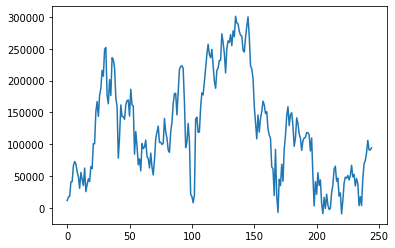

In [167]:
plt.plot(pnl_1)



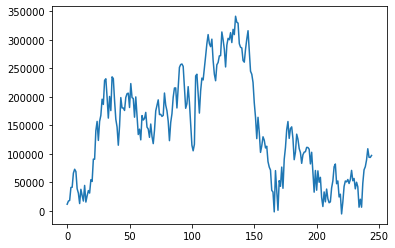

In [168]:
plt.plot(pnl_2)

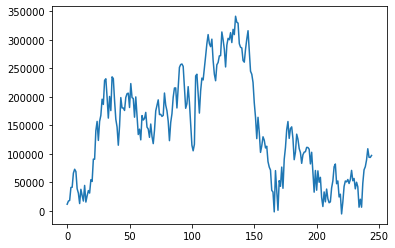

In [169]:
plt.plot(pnl_3)

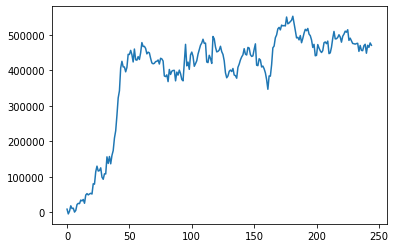

In [170]:
plt.plot(pnl_4)

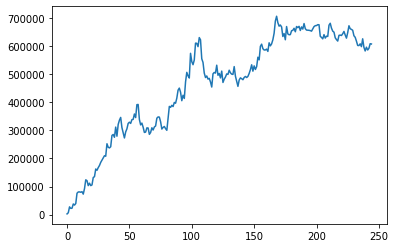

In [171]:
plt.plot(pnl_5)

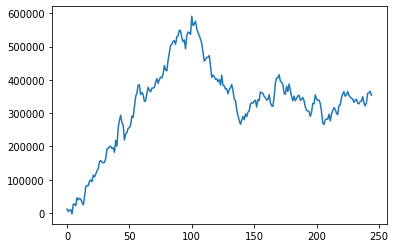

In [172]:
plt.plot(pnl_5_1)

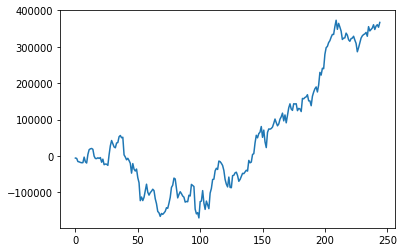

In [173]:
plt.plot(pnl_5_3)

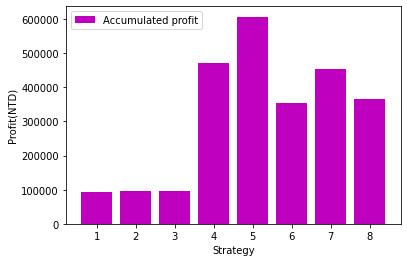

In [174]:
x=[1,2,3,4,5,6,7,8]
y=[total1,total2,total3,total4,total5,total5_1,total5_2,total5_3]
plt.bar(x,y,label='Accumulated profit',color='m')
plt.xlabel('Strategy')
plt.ylabel('Profit(NTD)')
plt.legend()


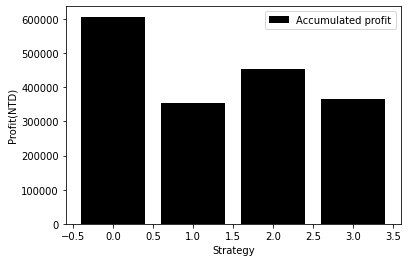

In [175]:
x=[0,1,2,3]
y=[total5,total5_1,total5_2,total5_3]
plt.bar(x,y,label='Accumulated profit',color='k')
plt.xlabel('Strategy')
plt.ylabel('Profit(NTD)')
plt.legend()